In [1]:
from qiskit import *
from qiskit.visualization import plot_bloch_multivector
from qiskit.visualization import plot_histogram
import numpy as np

In [2]:
matplotlib inline

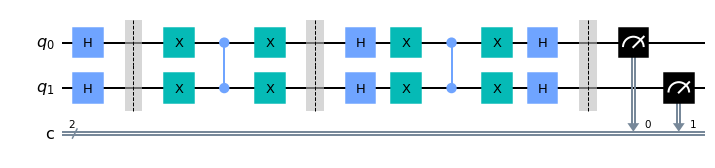

In [3]:
# Two qubit grover's search algorithm, target 00
circuit = QuantumCircuit(2, 2)
circuit.h([0,1])

circuit.barrier()

# Oracle
circuit.x(1)
circuit.x(0)
circuit.cz(0,1)
circuit.x(1)
circuit.x(0)

circuit.barrier()

# W gate
circuit.h([0,1])
circuit.x([0,1])
circuit.cz(0,1)
circuit.x([0,1])
circuit.h([0,1])

circuit.barrier()

# Measurement
circuit.measure(0, 0)
circuit.measure(1, 1)
circuit.draw(output='mpl')

In [4]:
simulator = Aer.get_backend('qasm_simulator')

{'00': 1000}


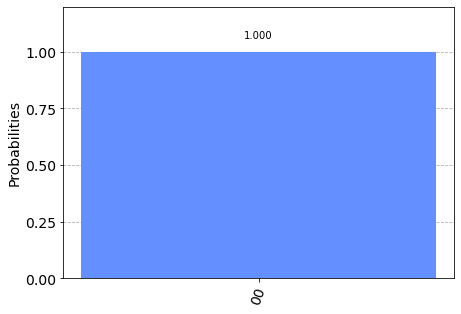

In [5]:
result = execute(circuit, backend = simulator, shots=1000).result()
counts = result.get_counts()

print(counts)
plot_histogram(counts)

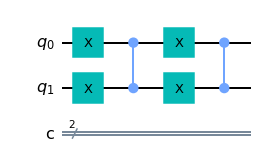

In [6]:
# Making U_f for the second circuit
qc = QuantumCircuit(2, 2)
qc.x(1)
qc.x(0)
qc.cz(0,1)
qc.x(1)
qc.x(0)
qc.cz(0,1)
qc.draw(output='mpl')

In [7]:
# Simulate the unitary
backend = Aer.get_backend('unitary_simulator')
unitary = execute(qc,backend).result().get_unitary()
# Display the results:
print(unitary)

[[-1.+0.j -0.+0.j -0.+0.j -0.+0.j]
 [ 0.+0.j  1.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  1.+0.j  0.+0.j]
 [-0.+0.j -0.+0.j -0.+0.j -1.+0.j]]


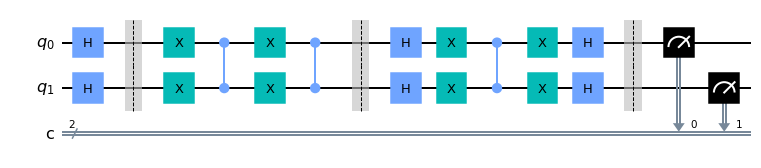

In [8]:
# Two qubit grover's search algorithm, target 00 and 11
circuit2 = QuantumCircuit(2, 2)
circuit2.h([0,1])

circuit2.barrier()

# Oracle
circuit2.x(1)
circuit2.x(0)
circuit2.cz(0,1)
circuit2.x(1)
circuit2.x(0)
circuit2.cz(0,1)

circuit2.barrier()

# W gate
circuit2.h([0,1])
circuit2.x([0,1])
circuit2.cz(0,1)
circuit2.x([0,1])
circuit2.h([0,1])

circuit2.barrier()

# Measurement
circuit2.measure(0, 0)
circuit2.measure(1, 1)
circuit2.draw(output='mpl')

{'00': 2518, '01': 2459, '10': 2504, '11': 2519}


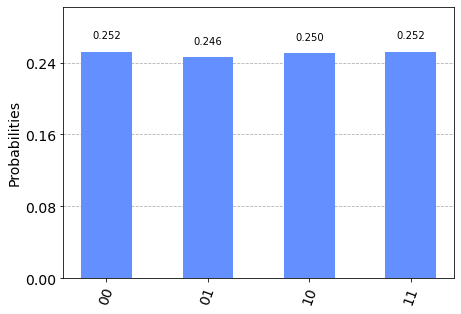

In [9]:
result2 = execute(circuit2, backend = simulator, shots=10000).result()
counts2 = result2.get_counts()

print(counts2)
plot_histogram(counts2)